# Using Buckley-Leverett

[Buckley-Leverett](https://petrowiki.spe.org/Macroscopic_displacement_efficiency_of_a_linear_waterflood#Buckley-Leverett_solution) concerns the saturation profiles in a waterflood going from the injector to the producer

The relative permeabilities here come from [Brooks and Corey](https://petrowiki.spe.org/Relative_permeability_models)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from pywaterflood.buckleyleverett import Reservoir, water_front_velocity, breakthrough_sw

Now, let's set the reservoir's rock and fluid properties


In [2]:
reservoir = Reservoir(
    phi=0.25,
    viscosity_oil=4.2e-3,
    viscosity_water=1e-3,
    sat_oil_r=0.2,
    sat_water_c=0.1,
    sat_gas_c=0.05,
    n_oil=2,
    n_water=2,
    flow_cross_section=1,
)

What's the water front's water saturation? What does the front velocity look like?


The saturation at the waterfront is 0.405


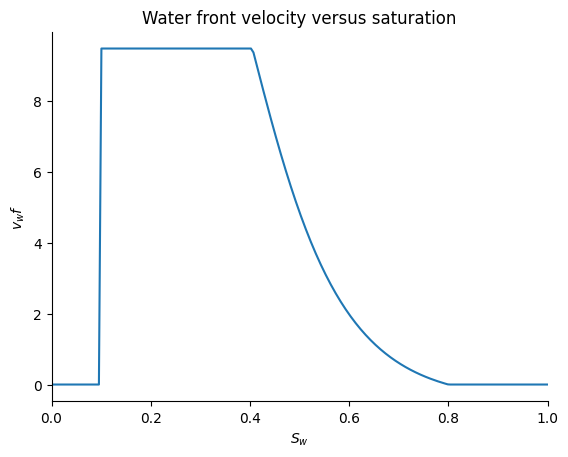

In [3]:
print(f"The saturation at the waterfront is {breakthrough_sw(reservoir)}")

saturations_water = np.linspace(0, 1, 200)
v_waterfront = [water_front_velocity(reservoir, s_w, 1.0) for s_w in saturations_water]

fig, ax = plt.subplots()
ax.plot(saturations_water, v_waterfront)
ax.set(
    xlim=(0, 1), xlabel="$S_w$", ylabel="$v_wf$", title="Water front velocity versus saturation"
)
sns.despine()

Okay, now how do the water flood fronts look like over time?


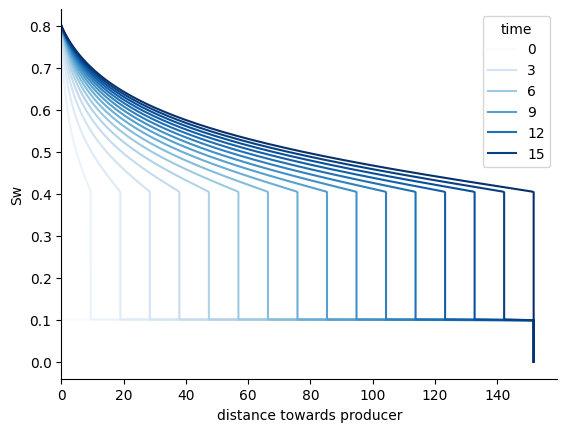

In [4]:
s_w_fronts = np.linspace(0, 1 - reservoir.sat_oil_r, 500)
df_swt = pd.DataFrame(
    {
        "time": 0.0,
        "Sw": s_w_fronts,
        "x_front": 0.0,
    }
)
front_velocities = np.array([water_front_velocity(reservoir, s_w, 1.0) for s_w in s_w_fronts])
dt = 1
end_t = 16
times = np.arange(0, end_t + dt, dt)
df_swt = pd.concat(
    [pd.DataFrame({"time": t, "Sw": s_w_fronts, "x_front": front_velocities * t}) for t in times]
)
distance_to_producer = max(df_swt["x_front"])
df_swt.loc[lambda x: x.Sw <= reservoir.sat_water_c, "x_front"] = distance_to_producer
g = sns.lineplot(df_swt, x="x_front", y="Sw", hue="time", orient="y", palette="Blues")
g.set(xlim=(0, None), xlabel="distance towards producer")
sns.despine()